In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

Import

In [18]:
df =pd.read_csv('mcdonalds.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


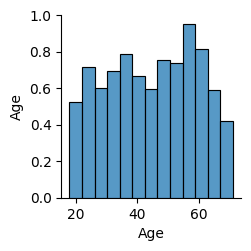

In [19]:
# print(data.describe())
print(df.info())
sns.pairplot(df)
plt.show()


In [42]:
print(pd.isnull(df).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
Cluster           0
dtype: int64


In [20]:
print(df.head(10))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   
5   Yes        Yes    No       Yes     No  Yes   Yes   Yes        No      No   
6   Yes        Yes   Yes       Yes     No  Yes    No   Yes       Yes     Yes   
7   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
8    No         No    No       Yes    Yes   No    No    No       Yes      No   
9   Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes      No   

  disgusting          Like  Age      VisitFrequency  Gender  
0         No            -3   61  Every three months  Fema

Replace I love it / I hate it with -5 to 5

In [21]:
df['Like'] = df['Like'].replace({
    'I love it!+5': '+5',
    'I hate it!-5': '-5',
})
print(df.head(10))


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   
5   Yes        Yes    No       Yes     No  Yes   Yes   Yes        No      No   
6   Yes        Yes   Yes       Yes     No  Yes    No   Yes       Yes     Yes   
7   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
8    No         No    No       Yes    Yes   No    No    No       Yes      No   
9   Yes        Yes    No       Yes    Yes  Yes    No   Yes       Yes      No   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No 

Encode catagorical columns

In [24]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

Cross Check

In [26]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int32
 1   convenient      1453 non-null   int32
 2   spicy           1453 non-null   int32
 3   fattening       1453 non-null   int32
 4   greasy          1453 non-null   int32
 5   fast            1453 non-null   int32
 6   cheap           1453 non-null   int32
 7   tasty           1453 non-null   int32
 8   expensive       1453 non-null   int32
 9   healthy         1453 non-null   int32
 10  disgusting      1453 non-null   int32
 11  Like            1453 non-null   int32
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int32
 14  Gender          1453 non-null   int32
dtypes: int32(14), int64(1)
memory usage: 90.9 KB
None
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      

a bar chart showing how many people said they “Like” McDonald’s

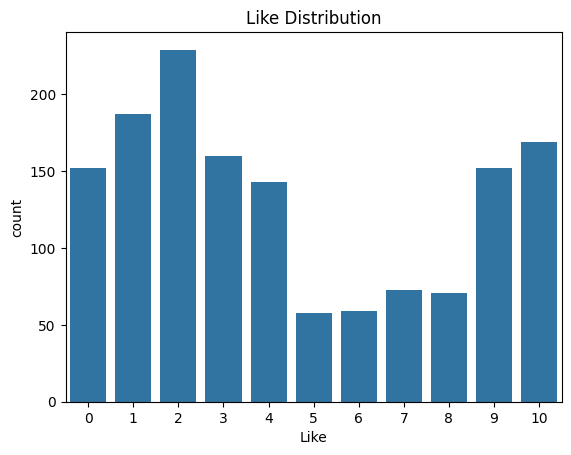

In [27]:
sns.countplot(x='Like', data=df)
plt.title('Like Distribution')
plt.show()


a histogram for age distribution. Tells you the age range of most customers.

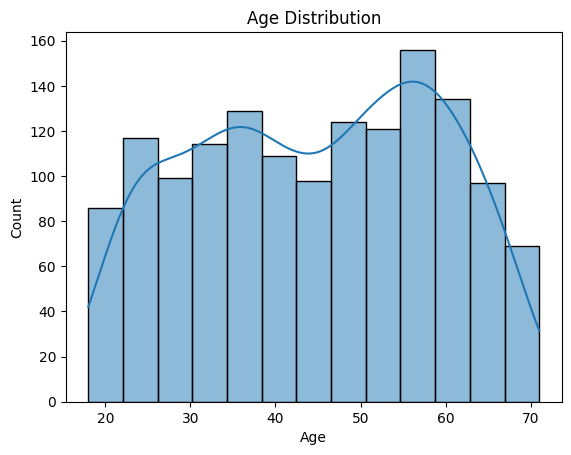

In [28]:

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Compressing 15 columns to 2 columns

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)


Grouping 3 cluster on the based on behavior

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)


Scatter plot, each color is a different segment

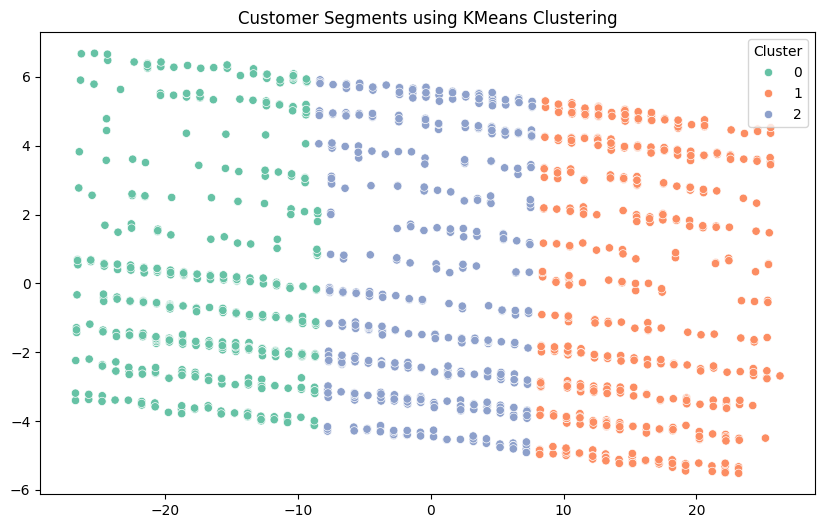

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments using KMeans Clustering')
plt.show()


In [35]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


            yummy  convenient     spicy  fattening    greasy      fast  \
Cluster                                                                  
0        0.751055    0.928270  0.052743   0.915612  0.691983  0.909283   
1        0.422701    0.888454  0.146771   0.821918  0.418787  0.911937   
2        0.493590    0.908120  0.076923   0.867521  0.476496  0.878205   

            cheap     tasty  expensive   healthy  disgusting      Like  \
Cluster                                                                  
0        0.630802  0.778481   0.356540  0.191983    0.217300  3.616034   
1        0.639922  0.559687   0.277886  0.199609    0.234834  5.068493   
2        0.521368  0.600427   0.446581  0.205128    0.277778  4.645299   

               Age  VisitFrequency    Gender  
Cluster                                       
0        27.843882        2.740506  0.474684  
1        60.232877        2.512720  0.442270  
2        44.517094        2.670940  0.457265  


In [39]:
df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.484431,-0.281653,-0.023896,-0.062545,-0.209186
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.274855,-0.070597,-0.035920,-0.041402,-0.028222
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.029596,0.146217,-0.017184,0.051015,0.033929
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,0.071720,-0.139254,0.005929,-0.059707,-0.057415
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.165256,-0.233554,0.007803,0.021801,-0.174346
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.108901,-0.020558,0.011130,-0.049027,-0.041633
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.115335,0.016958,0.032753,-0.116050,-0.089649
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.473550,-0.194576,-0.023878,-0.044385,-0.150212
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.108180,-0.070851,-0.009614,0.144113,0.075152
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.168800,0.021366,-0.008230,-0.042455,0.013262


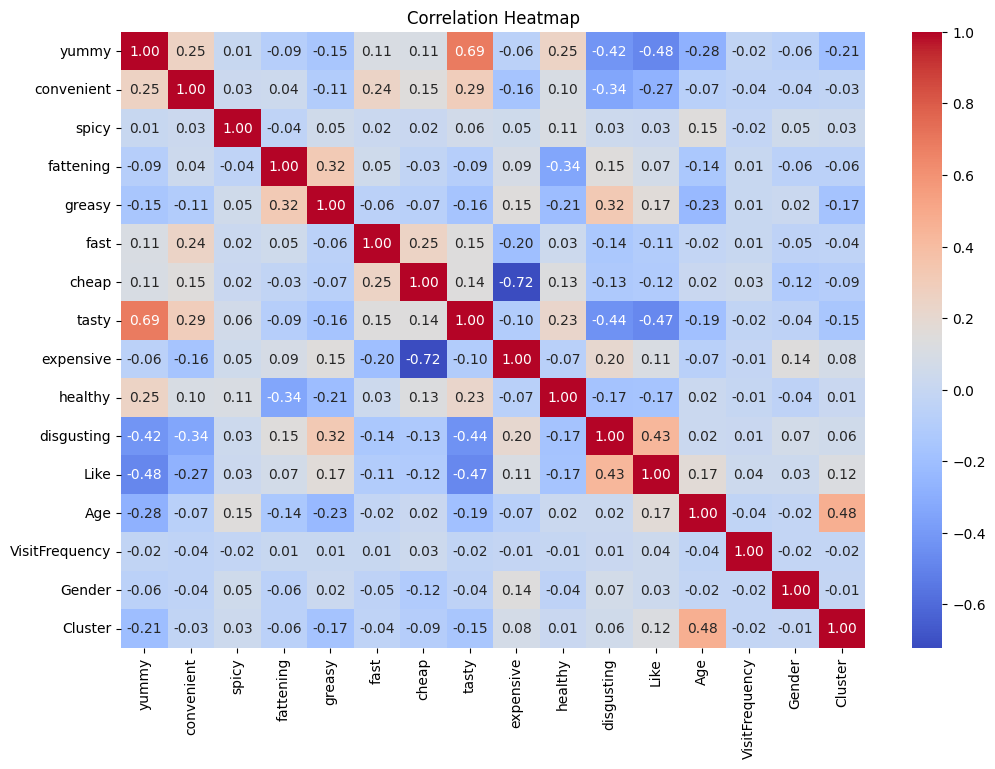

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

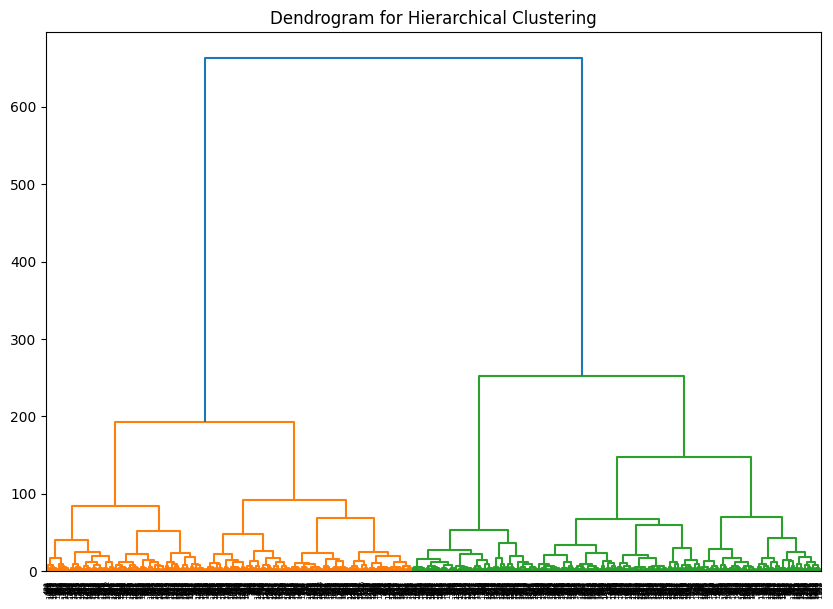

In [51]:
merg = linkage(df,method='ward')
plt.figure(figsize=(10, 7))
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [54]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Cluster'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 1.041338115024382
P-value: 0.5941229125667331
Degrees of Freedom: 2
Expected Frequencies:
 [[257.06262904 277.12869924 253.80867171]
 [216.93737096 233.87130076 214.19132829]]


In [ ]:
contingency = pd.crosstab(df['Gender'], df['Like'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 10.46947694751091, p-value: 0.40031327771439196


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
X = df.drop("Like", axis=1)
y = df["Like"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
print("Coefficients:", model.coef_)

Accuracy: 0.24398625429553264
Coefficients: [[-4.56084514e-01  3.67471568e-01 -4.82289270e-01  3.06077243e-01
  -1.22358900e-01  1.00150372e-01 -1.03782125e-01  8.63023083e-01
  -8.74312961e-04  2.41146867e-01 -2.69391267e-01  1.39648321e-02
  -4.45358801e-02  1.07852472e-01 -1.79732437e-01  9.80874427e-02]
 [ 3.71168791e-01  5.41418161e-01 -4.37797690e-01 -2.15569860e-02
  -6.14307779e-02 -1.21700459e-01  1.23977841e-01  3.68345280e-01
  -1.00289726e-01 -2.63595707e-02 -8.96833439e-01  8.83440630e-04
  -8.66991396e-02 -7.38627902e-02  1.81416955e-01  2.61163681e-01]
 [ 1.44513890e+00  1.04296140e+00 -3.07723042e-01 -1.10811580e-01
  -6.10612006e-01  2.58856918e-01 -2.82985541e-01  5.52012330e-01
  -2.25102017e-01  3.48601014e-01 -1.01914964e+00 -2.77074117e-02
  -4.05441855e-02 -3.09144020e-02 -1.41782177e-01 -2.13807254e-01]
 [ 1.88748625e+00  2.12575646e-01 -2.65025971e-01 -5.43022203e-01
  -3.30269783e-01  1.44333138e-01  2.27422838e-01  1.70849397e+00
   2.91043142e-02  2.29157637

c:\Users\ronak_8q45q08\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.metrics import classification_report, accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.08      0.12        38
           1       0.10      0.10      0.10        29
           2       0.26      0.46      0.33        46
           3       0.22      0.11      0.15        35
           4       0.29      0.31      0.30        26
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        15
           8       0.33      0.07      0.11        15
           9       0.37      0.82      0.51        28
          10       0.16      0.23      0.19        35

    accuracy                           0.24       291
   macro avg       0.18      0.20      0.16       291
weighted avg       0.20      0.24      0.20       291



c:\Users\ronak_8q45q08\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronak_8q45q08\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronak_8q45q08\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

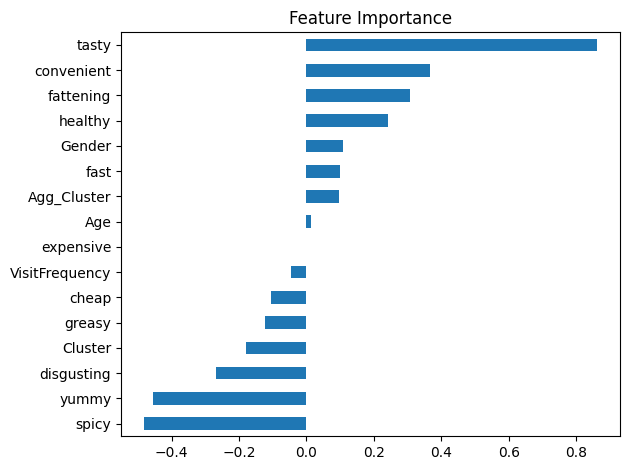

In [60]:
import matplotlib.pyplot as plt
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()
